# Cars4U Fitness Project
## Context:
Pre-owned car market has been growing faster than the new car market in the past few years in India
The Cars4U startup has collectd the dataset to predict the price of the pre-owned cars
### Data:
used_cars_data.csv file contains different attributes of used cars sold in various locations:
* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

## Objective: 
Generate a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing
## Key steps of the project:
* Explore and visualize the dataset, perform an Exploratory Data Analysis, Illustrate the insights based on EDA
* Clean and prepare the data
* Build a linear regression model to predict the prices of used cars, evaluate model performance
* Generate a set of insights and recommendations that will help the business

## 1. Loading Python packages and data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# # this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# to split the data into train and test
from sklearn.model_selection import train_test_split
# to build linear regression_model
from sklearn.linear_model import LinearRegression
# # to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the dataset
data = pd.read_csv('used_cars_data.csv')

## 2. Understanding the data

In [5]:
# Displaying fist 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# Viewing random data sample to get a better understanding
data.sample(
    10, random_state=2
)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


<font color = 'darkblue'>
    
**Observation:**
* The *	S.No.* column can be used as index label or dropped
* The *Mileage* column entries have literals such as "kmpl" in the end
* The *Engine* column entries have literals such as "CC" in the end
* The *Power* column entries have literals such as "bhp" in the end
* The *New_Price* column entries have literals such as " Lakh" in the end and a lot of missing values
* The *Price* column has some missing values

In [7]:
# Checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


In [8]:
# Printing column headers
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
# Checking column names and corresponding data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<font color = 'darkblue'>
    
**Observation:**
* Columns *Mileage*, *Engine*, *Power* and *New_Price* are defined as categorical and possibly need conversion to int/float type
* The *Seats* column is defined as float, however integer might be more appropriate

In [10]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

<font color = 'darkblue'>
    
**Observation:**
There are no duplicates in the data

In [11]:
# Brief statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'darkblue'>
    
**Observation:**
* Cars in the database vary from 1996 to 2019 of age
* Max kilometers driven is 6.5mln, which might be an outlier
* Some enries have 0 number of seats, which need further inquiry

In [12]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<font color = 'darkblue'>
    
**Observation:**
There are missing values in some columns, *New_Price* having the most

<font color = 'blue'>
    
### Analyzing categorical features

In [13]:
#Printing unique names and their total number for categorical columns
cat_columns = data[["Location", "Fuel_Type", "Transmission", "Owner_Type"]]
for column in cat_columns:
    print(data[column].value_counts())
    print("-" * 50)

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------


<font color = 'darkblue'>
    
**Observation:**
Categorical columns entries are consisent, no hidden missing entries present

<font color = 'blue'>

### Understanding variability of non-numerical part of Mileage, Engine, Power, New_Price features

In [14]:
Mileage_Split=data["Mileage"].str.split(" ", n=1, expand=True)
print(Mileage_Split.describe())
Mileage_Split[1].value_counts()

           0     1
count   7251  7251
unique   438     2
top     17.0  kmpl
freq     208  7177


kmpl     7177
km/kg      74
Name: 1, dtype: int64

<font color = 'darkblue'>
    
**Observation:**
There are 2 missing values in "Mileage" column and 7251 entries with either " kmpl" or " km/kg" at the end, no other numerical or object data present

In [15]:
Engine_Split=data["Engine"].str.split(" ", n=1, expand=True)
Engine_Split.describe()

,0,1
count,7207,7207
unique,150,1
top,1197,CC
freq,732,7207


<font color = 'darkblue'>
    
**Observation:**
There are 46 missing values in Engine column and 7207 entries with " CC" at the end, no other numerical or object data present

In [16]:
Power_Split=data["Power"].str.split(" ", n=1, expand=True)
Power_Split.describe()

,0,1
count,7078,7078
unique,385,1
top,74,bhp
freq,280,7078


<font color = 'darkblue'>
    
**Observation:**
There are 175 missing values in Engine column and 7078 entries with " bhp" at the end, no other numerical or object data present

In [17]:
New_Price_Split=data["New_Price"].str.split(" ", n=1, expand=True)
print(New_Price_Split.describe())
New_Price_Split[1].value_counts()

           0     1
count   1006  1006
unique   625     2
top     4.78  Lakh
freq       6   986


Lakh    986
Cr       20
Name: 1, dtype: int64

<font color = 'darkblue'>
    
**Observation:**
There are 6247 missing values in New_Price column and 1006 entries with either " Lakh" or " Cr" at the end, no other numerical or object data present

## 3. Processing columns

In [18]:
# Creating original's data copy
data1=data.copy()

<font color = 'blue'>
    
### Dropping missing values in the target column and unnecessary columns

In [19]:
# Fist step is to drop unecessary data to reduce the data size
data1.dropna(subset=["Price"], inplace=True)
data1.drop(['S.No.'], axis=1, inplace=True)
# Checking the result
data1.isnull().sum().sort_values(ascending=False)

New_Price            5195
Power                 143
Seats                  42
Engine                 36
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Price                   0
dtype: int64

<font color = 'blue'>
    
### Dealing with numerical data that is defined as object

In [20]:
# Mileage feature has kmpl or km/kg at the end of the string, both referring to the distance covered (in km) per unit of fuel.
# To convert to numbers we need to remove non-numerical end part.
"""For each value, take the number before the 'k', unless it is not a string value.
This will only happen for NaNs so in that case we just return NaN"""
def Mileage_split(Mileage_value):

    if isinstance(Mileage_value, str):   # checks if entry is a string
        return float(Mileage_value.split('k')[0])  # keeps only first part before the split
    else:
        return np.nan

Mileage_column = ['Mileage']

for colname in Mileage_column:
    data1[colname] = data1[colname].apply(Mileage_split)

In [21]:
# Removing non-numerical part at the end of the string for Engine, Power features
"""For each value, take the number before the ' ', unless it is not a string value.
This will only happen for NaNs so in that case we just return NaN"""
def Space_split(Column_value):

    if isinstance(Column_value, str):  # checks if entry is a string
        return float(Column_value.split(' ')[0])  # keeps only first part before the split
    else:
        return np.nan

columns_to_num = ['Engine', 'Power']

for colname in columns_to_num:
    data1[colname] = data1[colname].apply(Space_split)

In [22]:
"""This function takes in a string representing a price of new cars in either Lakh or Cr
    and converts it to a number using conversion rate of 1 Cr = 100 Lakh.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
def New_Price_to_num(price_val):
        if isinstance(price_val, str):  # checks if entry is a string
            multiplier = 1
            if price_val.endswith(' Lakh'):
                multiplier = 1
            elif price_val.endswith(' Cr'):
                multiplier = 100
            return float(price_val.replace(' Lakh', '').replace(' Cr', '')) * multiplier
        else:
            return np.nan

data1['New_Price'] = data1['New_Price'].apply(New_Price_to_num)

<font color = 'blue'>
    
### Extracting car Make from Name column in case we will need it for analysis

In [23]:
data1["Make"]= data1["Name"].str.split(" ").str[0]
data1.drop(['Name'], axis=1, inplace=True)

<font color = 'blue'>
    
### Adressing 0 values in Seats variable

In [24]:
# Counting unique values
data1['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [25]:
data1[data1['Seats']==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0,Audi


<font color = 'darkblue'>
    
**Observation:**
0 number of seats in "Seats" variable is a one time occurance for Audi A4 3.2 FSI Tiptronic Quattro, which normally has 5 seats. Therefore it can be corrected manually

In [26]:
# Correcting Seats value to 5
data1.loc[[3999],'Seats'] = 5

In [27]:
data1.iloc[3998:4001, :] #Checking the correction result

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
3998,Chennai,2005,120000,Diesel,Manual,Second,12.7,2609.0,116.60,8.0,NaN,2.9,Mahindra
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,5.0,NaN,18.0,Audi
4000,Kolkata,2011,37000,Diesel,Manual,First,20.0,1399.0,68.05,5.0,NaN,1.8,Ford


In [28]:
data1.iloc[145:150,:]   #Checking the overall result

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
145,Pune,2014,38800,Petrol,Manual,First,18.60,1199.0,76.80,5.0,NaN,2.85,Chevrolet
146,Chennai,2013,83000,Diesel,Manual,First,21.14,1498.0,103.52,5.0,NaN,4.75,Skoda
147,Kochi,2018,41283,Petrol,Manual,First,20.73,1373.0,91.10,5.0,NaN,9.90,Maruti
148,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,128.00,37.00,Audi
149,Mumbai,2014,48000,Diesel,Automatic,First,21.76,1995.0,190.00,5.0,60.88,26.50,BMW


In [29]:
data1.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Make                  object
dtype: object

<font color = 'darkblue'>
    
**Observation:**
After removal and conversion of numerical data entered as objects, data is ready for itial plotting

In [30]:
# Let's look at the new statistical summary of the data
data1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,18.134961,4.582289,0.0,15.17,18.15,21.1,33.54
Engine,5983.0,NaN,NaN,NaN,1621.27645,601.355233,72.0,1198.0,1493.0,1984.0,5998.0
Power,5876.0,NaN,NaN,NaN,113.25305,53.874957,34.2,75.0,97.7,138.1,560.0
Seats,5977.0,NaN,NaN,NaN,5.279572,0.80596,2.0,5.0,5.0,5.0,10.0


## 4. Exploratory Data Analysis

<font color = 'blue'>
    
### Univariate analysis to understand data distributions

### Numerical variables

In [31]:
# Creating a function to visualize boxplot and histogram for any input numerical variable along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Variable Year

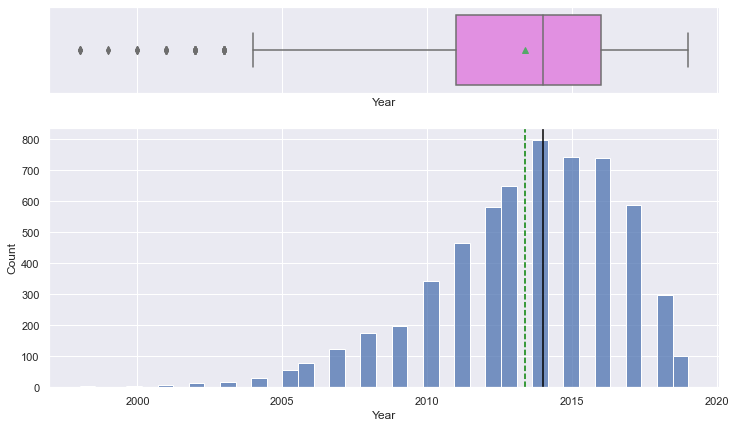

In [32]:
histogram_boxplot(data1, "Year")

<font color = 'darkblue'>
    
**Observation:**
Cars production year is a left skewed distribution, majority of database cars were produced between 2011 and 2016.

#### Variable Kilometers_Driven

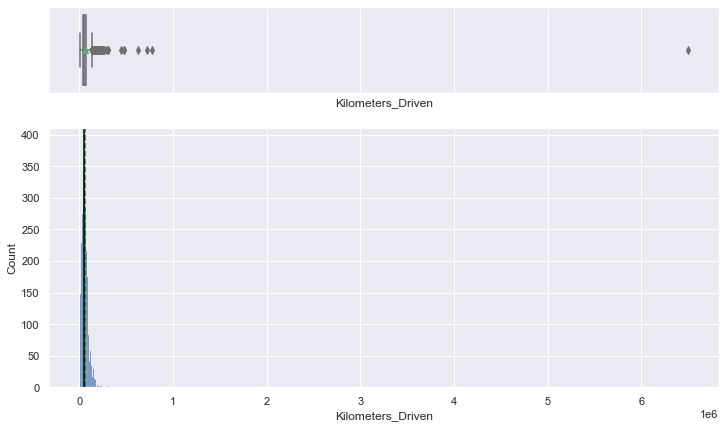

In [33]:
histogram_boxplot(data1, "Kilometers_Driven")

<font color = 'darkblue'>
    
**Observation:**
Total kilometers driven is a right skewed distribution with an obvious outlier of ~6.5mln km that needs correction

In [34]:
# Locating an outlier
data1[data1['Kilometers_Driven']>1000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,BMW


In [35]:
# Dropping a row with an outlier
data1=data1.drop([2328], axis=0)
# Checking that removal was successfull
data1.iloc[2327:2330,:]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
2327,Coimbatore,2015,57934,Diesel,Manual,First,18.20,1248.0,73.74,8.0,NaN,5.50,Chevrolet
2329,Jaipur,2015,63000,Diesel,Manual,First,20.14,1498.0,88.80,5.0,NaN,5.11,Volkswagen
2330,Mumbai,2012,27014,Petrol,Manual,First,16.25,1198.0,75.00,5.0,NaN,2.19,Skoda


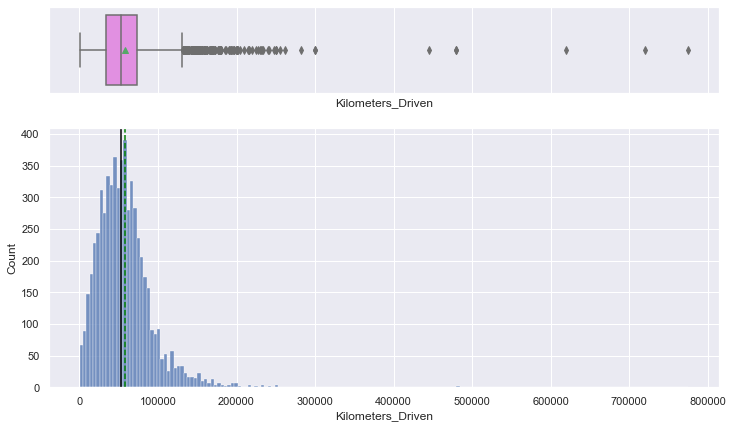

In [36]:
# Creating a new plot
histogram_boxplot(data1, "Kilometers_Driven")

<font color = 'darkblue'>
    
**Observation:**
Total kilometers driven is still a highly right skewed distribution, however all other oultlying values seem reasonable and do not need additional correction at this moment. Candidate for variable transformation procedure.

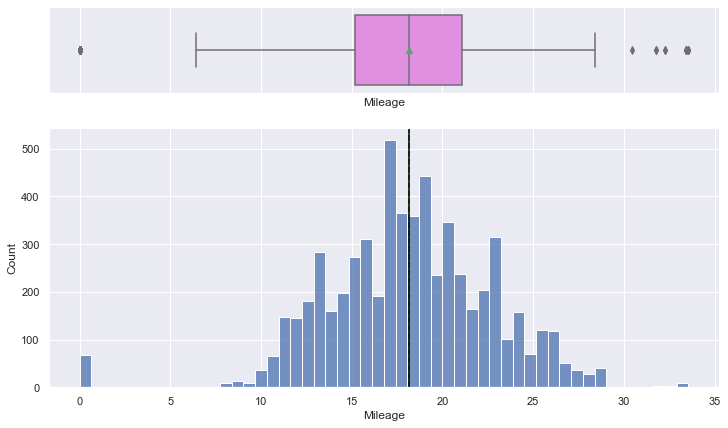

In [37]:
histogram_boxplot(data1, "Mileage")

<font color = 'darkblue'>
    
**Observation:**
Mileage variable has a normal distribution, mean of the variable can be used to impute missing values, 0 entries seem as outliers/errors that need to be treated

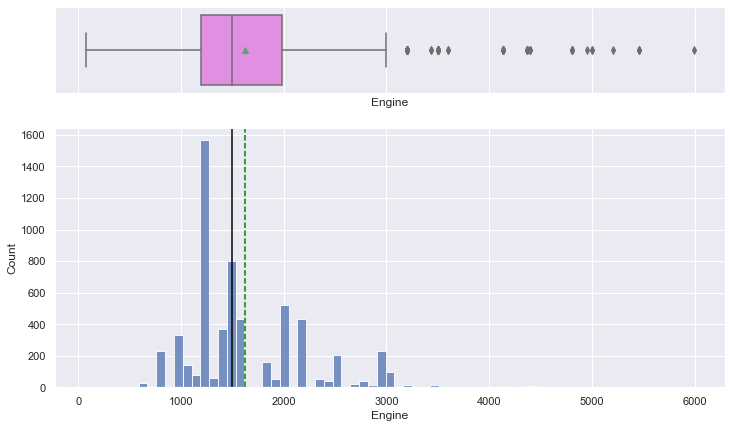

In [39]:
histogram_boxplot(data1, "Engine")

<font color = 'darkblue'>
    
**Observation:**
Engine variable has right skewed distribution, median can be used to impute missing values.  Candidate for variable transformation procedure.

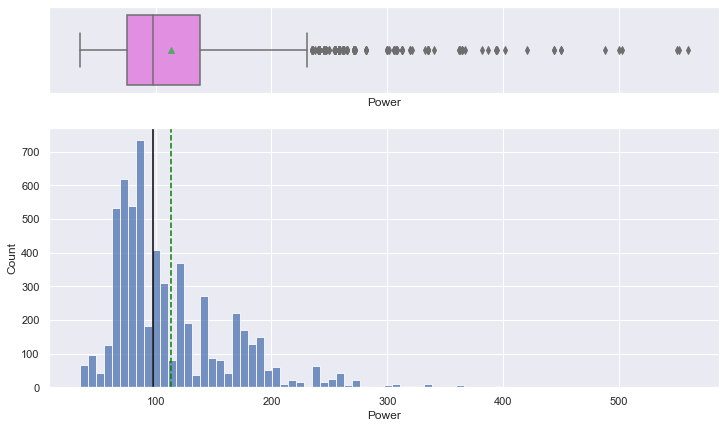

In [40]:
histogram_boxplot(data1, "Power")

<font color = 'darkblue'>
    
**Observation:**
Power variable has a right skewed distribution, median can be used to impute missing values.  Candidate for variable transformation procedure.

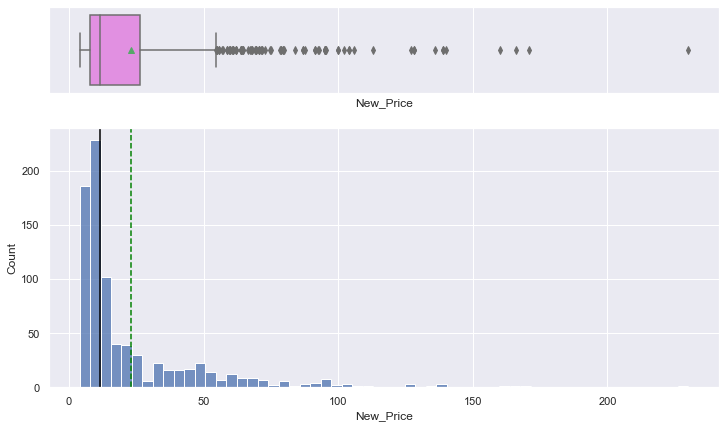

In [41]:
histogram_boxplot(data1, "New_Price")

<font color = 'darkblue'>
    
**Observation:**
New_Price variable that corresponds to the price of the analogoues new car has right skewed distribution. Candidate for variable transformation procedure.

In [42]:
# Locating possible outlier
data1[data1['New_Price']>200]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,230.0,160.0,Land


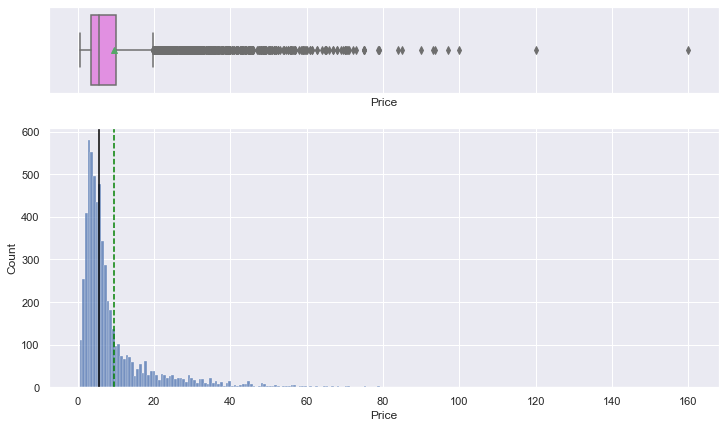

In [43]:
histogram_boxplot(data1, "Price")

<font color = 'darkblue'>
    
**Observation:**
Price variable has right skewed distribution and entries over 110 might be outliers.  Candidate for variable transformation procedure.

In [44]:
# Locating possible outliers
data1[data1['Price']>110]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,230.0,160.0,Land
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,120.0,Lamborghini


<font color = 'darkblue'>
    
**Observation:**
There are 2 potential outliers with values. While Laborghini price might seem reasonable, it is higly unlikely that Land Rover with higher mileage and first owened has higher price, both new and pre-owned.

### Categorical variables

In [45]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

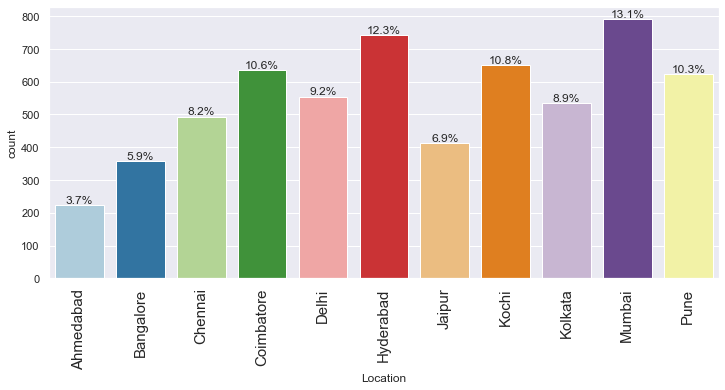

In [46]:
labeled_barplot(data1, "Location", perc=True)

<font color = 'darkblue'>
    
**Observation:**
Most sales data comes from cities of Mumbai, Hyderabad, Kochi, Coimbatore and Pune

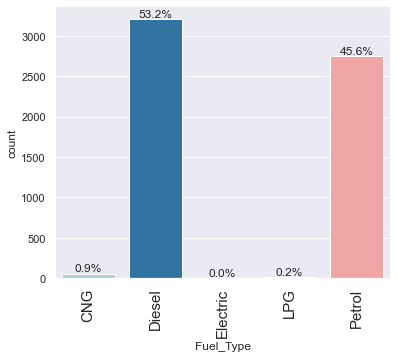

In [47]:
labeled_barplot(data1, "Fuel_Type", perc=True)

<font color = 'darkblue'>
    
**Observation:**
Diesel cars are a little more dominant than petrol on the pre-owned cars market. CNG, Electric and LPG cars are very rare

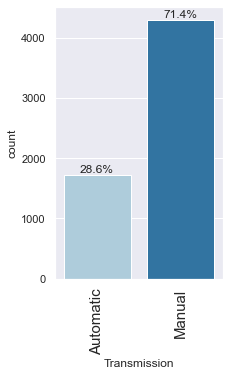

In [48]:
labeled_barplot(data1, "Transmission", perc=True)

<font color = 'darkblue'>
    
**Observation:**
Manual transmission cars are more popular than automatic

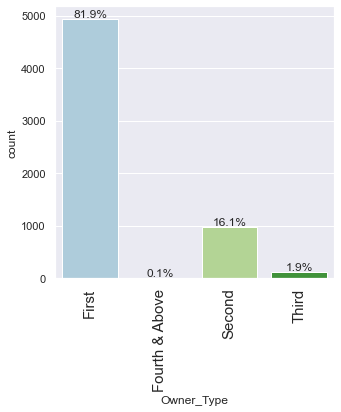

In [49]:
labeled_barplot(data1, "Owner_Type", perc=True)

<font color = 'darkblue'>
    
**Observation:**
One owner cars are dominant on the market, Second being after and Third and more being negligent

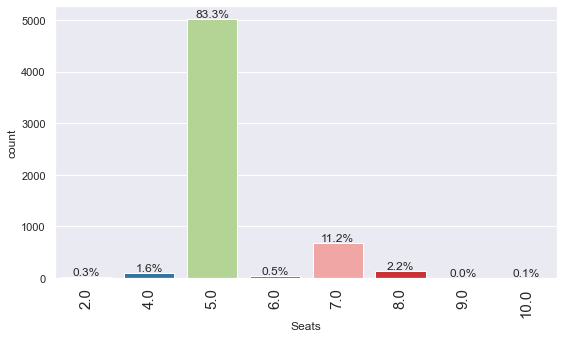

In [50]:
labeled_barplot(data1, "Seats", perc=True)

<font color = 'darkblue'>
    
**Observation:**
Seats variable is a descrete numerical variable, number of seats "5" being most common

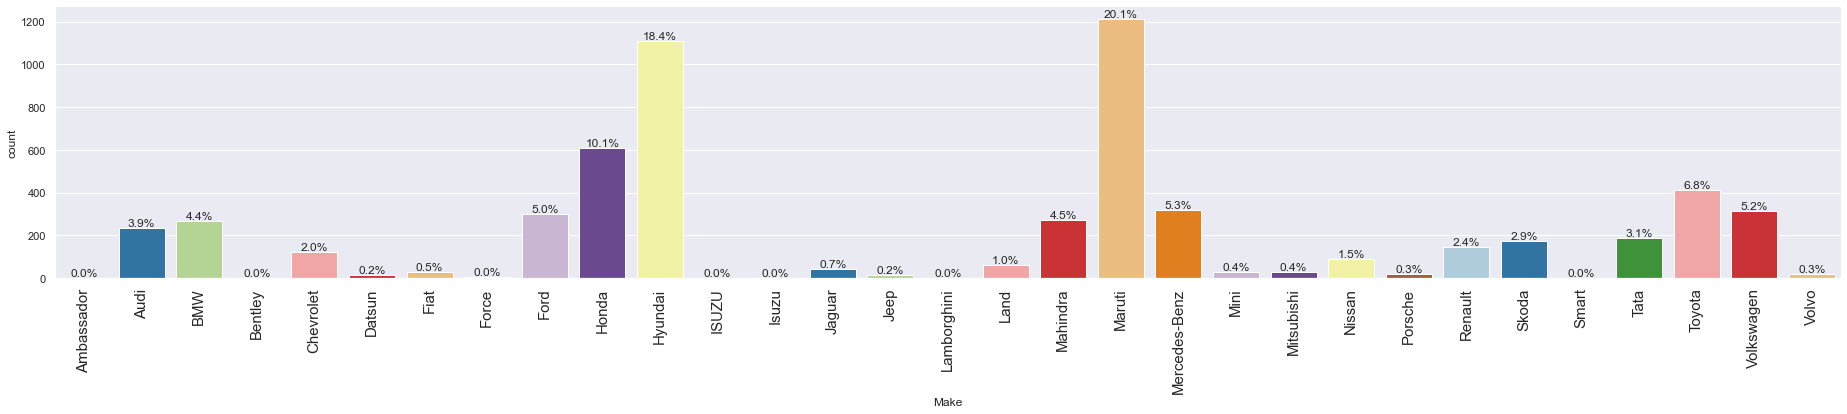

In [51]:
labeled_barplot(data1, "Make", perc=True)

<font color = 'darkblue'>
    
**Observation:**
Mariti, Hyundai and Honda are the most popular vehicles in the pre-owned market

<font color = 'blue'>
    
### Multivariate plots

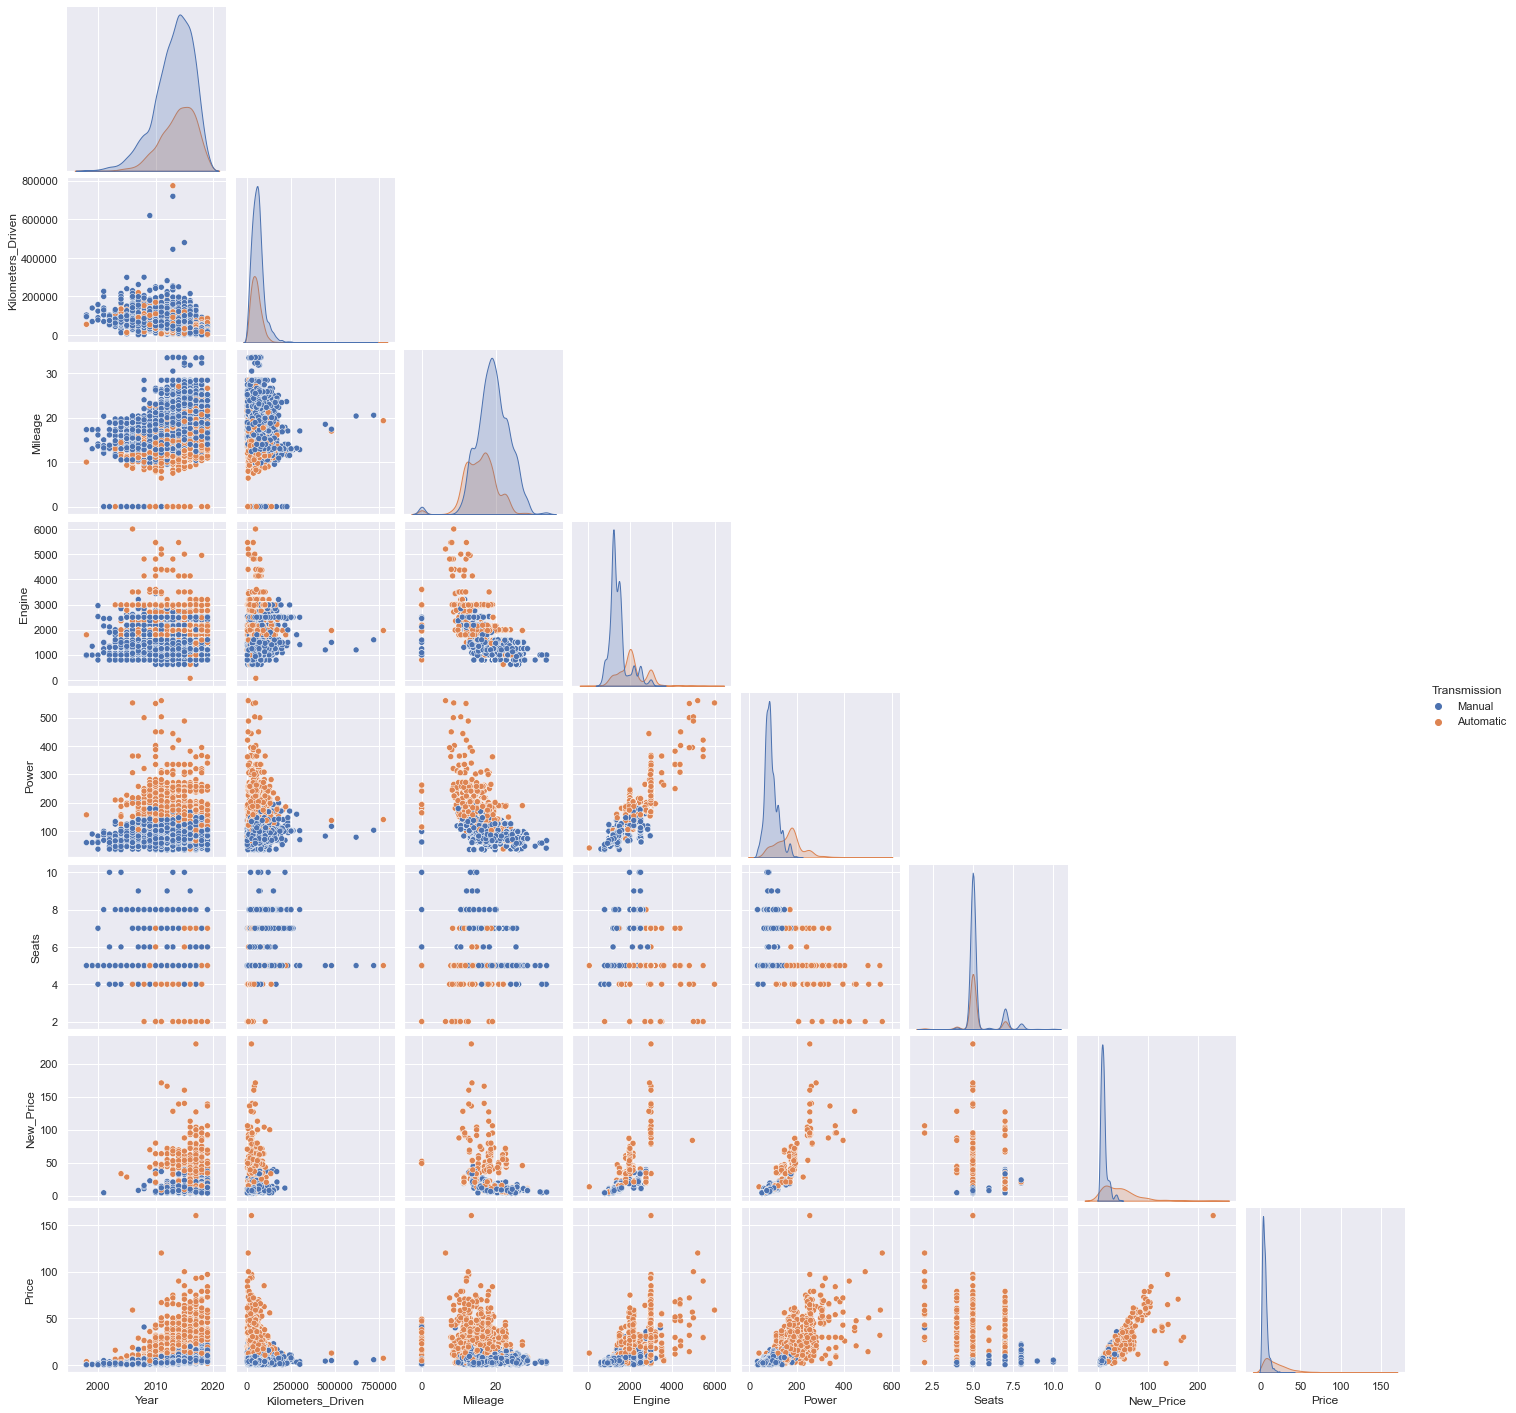

In [52]:
# Let's visualize pairplot
sns.pairplot(data=data1, hue="Transmission", diag_kind="kde", corner=True)
plt.show()

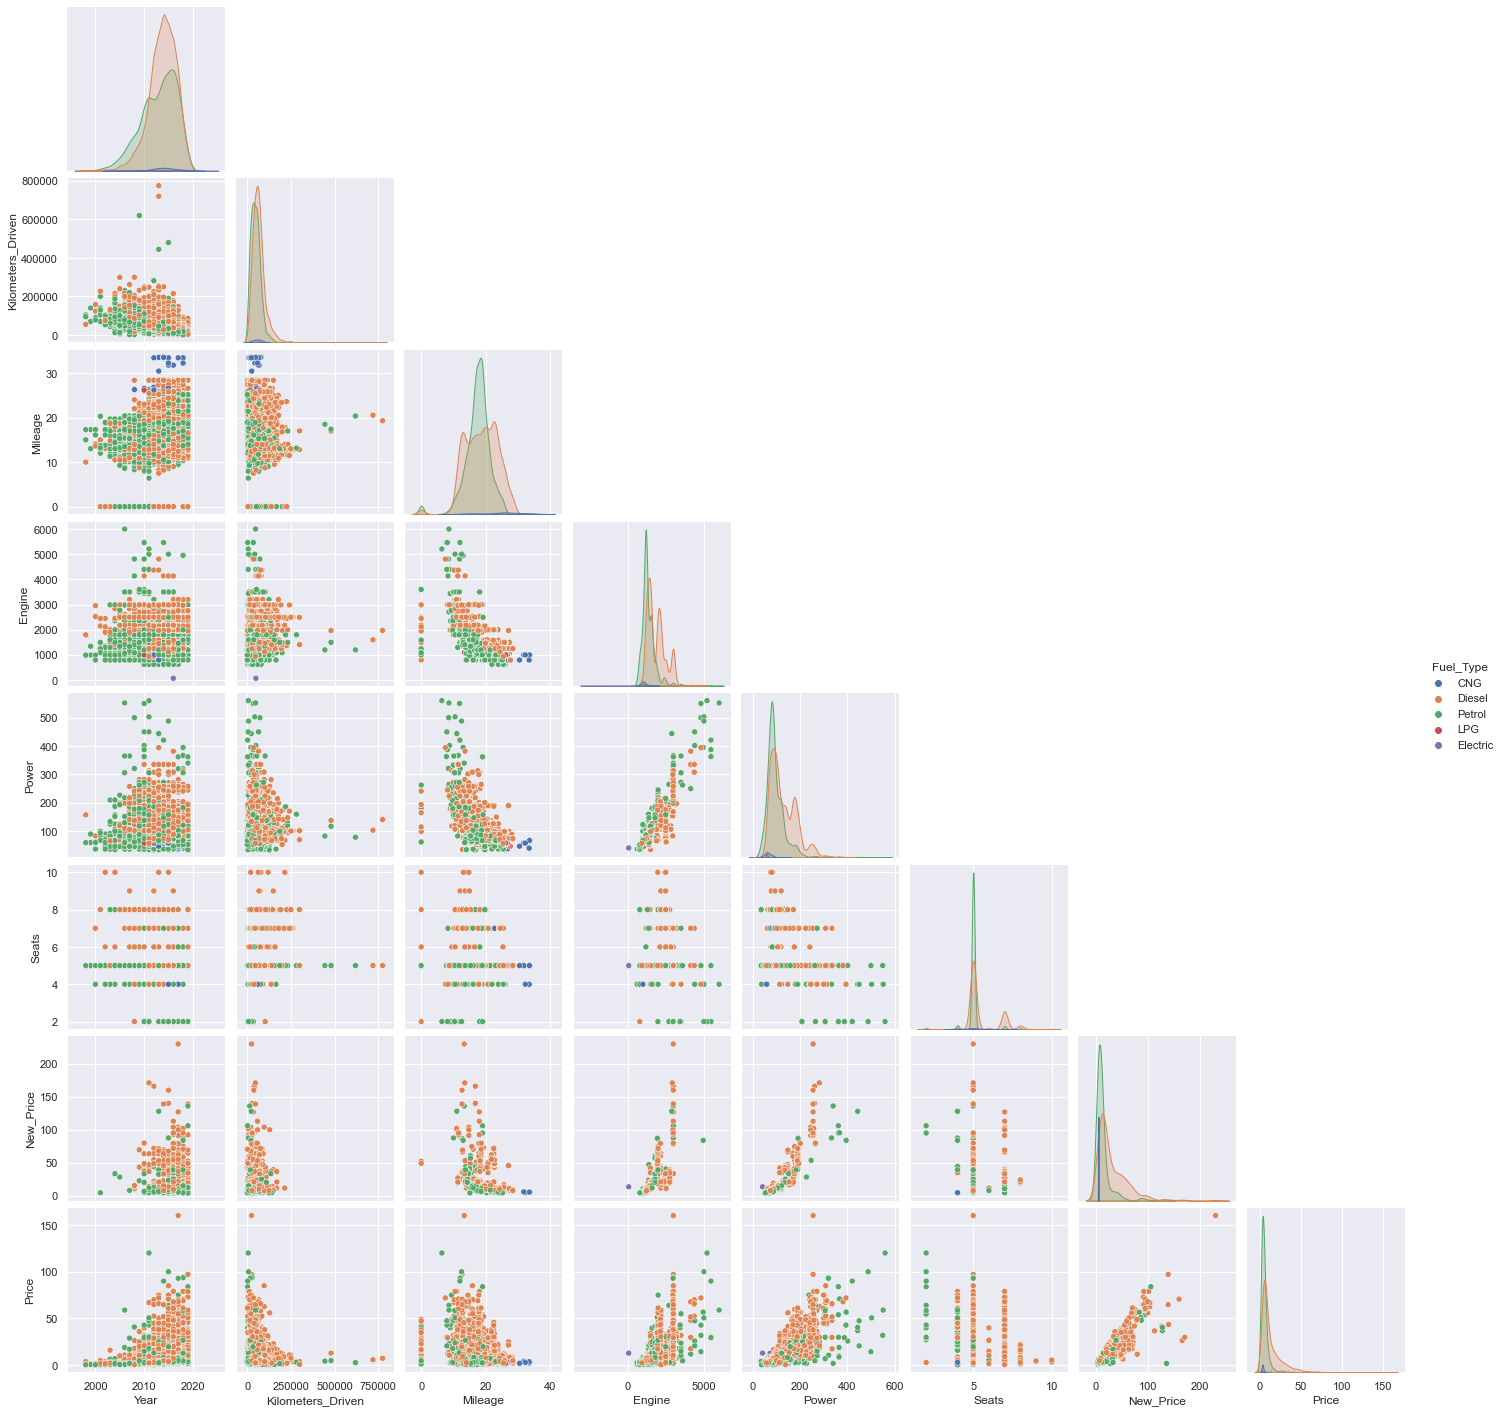

In [55]:
# Let's visualize pairplot
sns.pairplot(data=data1, hue="Fuel_Type", diag_kind="kde", corner=True)
plt.show()

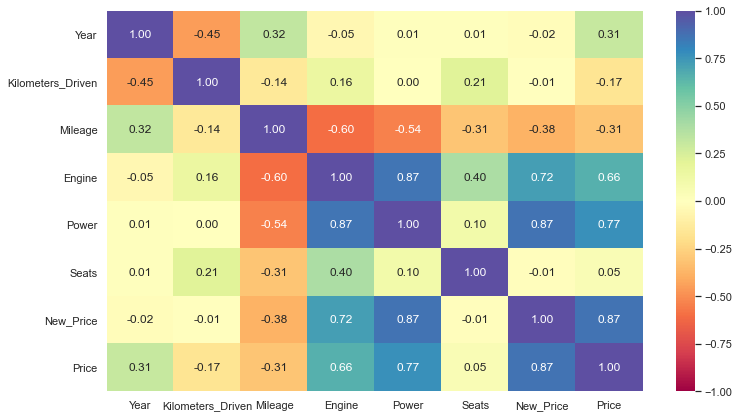

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<font color = 'darkblue'>
    
**Observation:**
- Pairlots colored by transmission type illustrates for majoiry of vehicle automatic tranmsmission being generally higher priced than manual, which is expected
- Entry with price over 150 seems to distort the pairplots that is confimed by our previous observation of a price of Land Rover. We will treat is as outlier and remove this entry in Data correction section
- Mileage entries of 0 seem to cluster separately and possible need removal
- Seats variable being discrete values possible need to be converted to categorical type
- Kilometers Driven over 400000 cluster separately on Price/Kilometers_Driven plot and possibly need to be treated as outliers to improve correlation
- Plot shows that fuel types other than Diesel and Petrol tend to cluster separately

## 5. Data correction

In [57]:
# Creating a data copy
data2=data1.copy()

<font color = 'blue'>
    
### Removing 0 values in Mileage variable

In [58]:
data2['Mileage'] = data2['Mileage'].replace(0, np.nan)  #Replacing 0 with nulls
data2.dropna(subset=["Mileage"], inplace=True)  # Dropping nulls
data2.isnull().sum().sort_values(ascending=False)  # Checking result

New_Price            5129
Power                 104
Seats                  30
Engine                 25
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Price                   0
Make                    0
dtype: int64

<font color = 'blue'>
    
### Missing values

- For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
- For a skewed numerical variable, the median of the variable can be used to impute missing values.
- For a categorical variable, the most frequent value can be used to impute missing values.

In [59]:
# Mileage variable has a normal distribution, using `fillna` function to replace nans with mean
data2['Mileage'].fillna(data2['Mileage'].mean(), inplace=True)

# Engine and Power variables have a skewed distribution, using `fillna` function to replace nans with median
data2['Engine'].fillna(data2['Engine'].median(), inplace=True)
data2['Power'].fillna(data2['Power'].median(), inplace=True)

# For seats variable it will be more sensible to use mode=5 to replace nans
data2['Seats'] = data2['Seats'].replace(np.nan, 5)

In [60]:
print(data2.shape)
data2.isnull().sum().sort_values(ascending=False)

(5948, 13)


New_Price            5129
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                   0
Make                    0
dtype: int64

<font color = 'blue'>
    
### Variable transformations

Variables 'Kilometers_Driven', 'Engine', 'Power', 'New_Price' and 'Price'  have been identified as candidates for Variable Transformation

Text(0.5, 1.0, 'sqrt(Kilometers_Driven)')

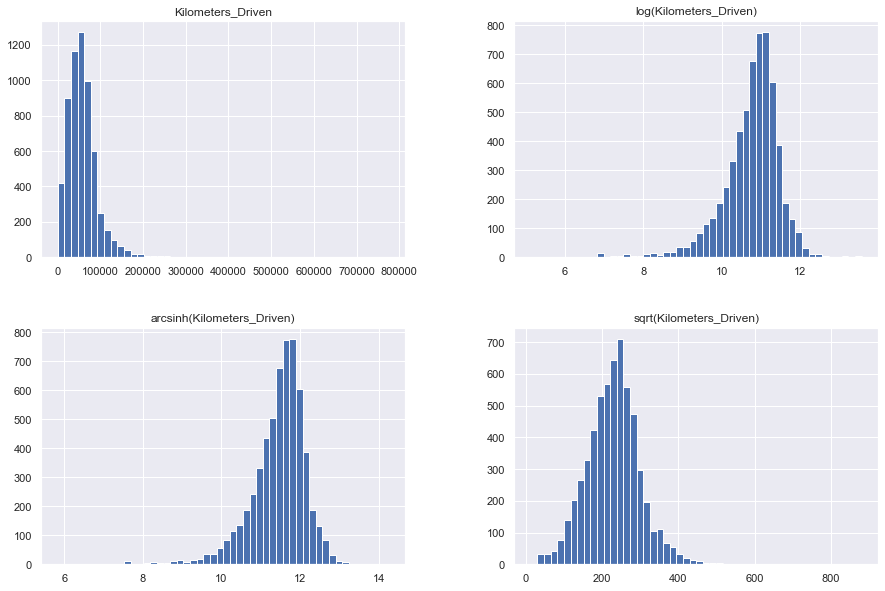

In [61]:
# testing various tranformations for 'Kilometers_Driven'
data.hist(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data1['Kilometers_Driven'], 50)
plt.title('Kilometers_Driven')
plt.subplot(2,2,2)
plt.hist(np.log(data2['Kilometers_Driven']), 50)
plt.title('log(Kilometers_Driven)')
plt.subplot(2,2,3)
plt.hist(np.arcsinh(data2['Kilometers_Driven']), 50)
plt.title('arcsinh(Kilometers_Driven)')
plt.subplot(2,2,4)
plt.hist(np.sqrt(data2['Kilometers_Driven']), 50)
plt.title('sqrt(Kilometers_Driven)')

Text(0.5, 1.0, 'sqrt(Engine)')

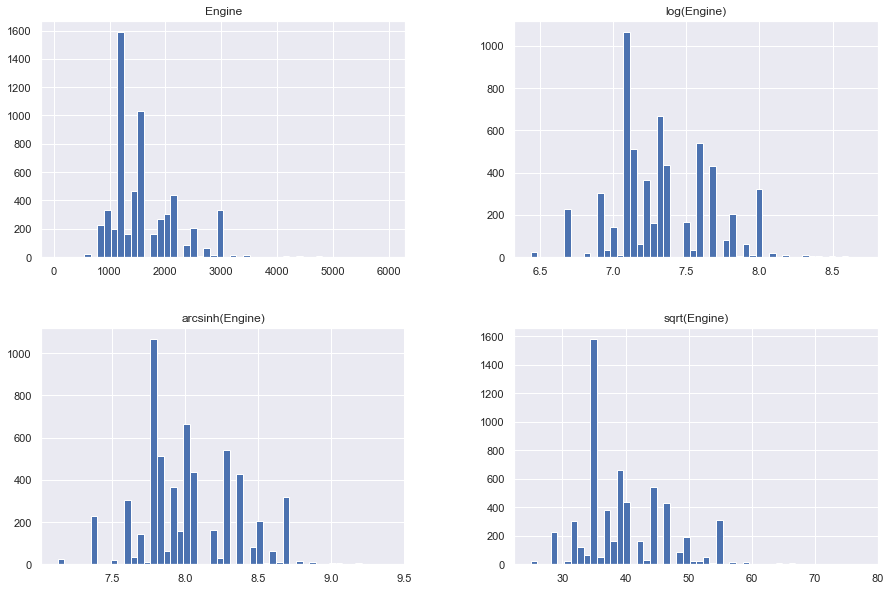

In [62]:
# testing various tranformations for 'Engine'
data.hist(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data1['Engine'], 50)
plt.title('Engine')
plt.subplot(2,2,2)
plt.hist(np.log(data2['Engine']), 50)
plt.title('log(Engine)')
plt.subplot(2,2,3)
plt.hist(np.arcsinh(data2['Engine']), 50)
plt.title('arcsinh(Engine)')
plt.subplot(2,2,4)
plt.hist(np.sqrt(data2['Engine']), 50)
plt.title('sqrt(Engine)')

Text(0.5, 1.0, 'sqrt(Power)')

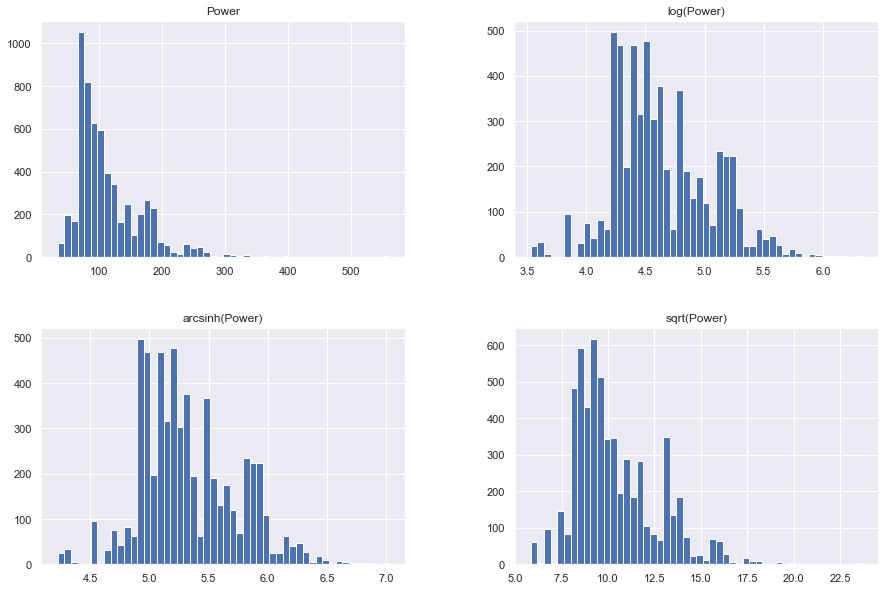

In [63]:
# testing various tranformations for 'Power'
data.hist(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data1['Power'], 50)
plt.title('Power')
plt.subplot(2,2,2)
plt.hist(np.log(data2['Power']), 50)
plt.title('log(Power)')
plt.subplot(2,2,3)
plt.hist(np.arcsinh(data2['Power']), 50)
plt.title('arcsinh(Power)')
plt.subplot(2,2,4)
plt.hist(np.sqrt(data2['Power']), 50)
plt.title('sqrt(Power)')

Text(0.5, 1.0, 'sqrt(New_Price)')

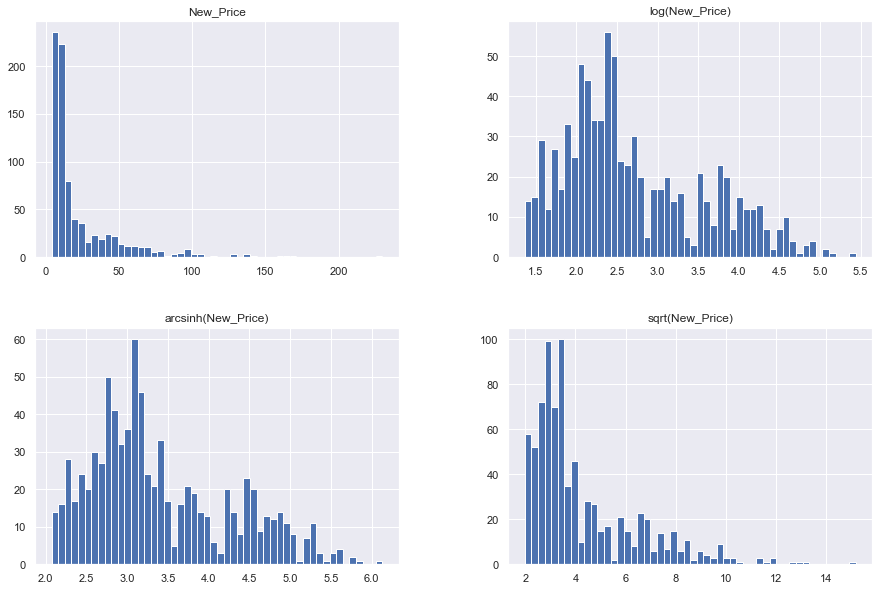

In [64]:
# testing various tranformations for 'New_Price'
data.hist(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data1['New_Price'], 50)
plt.title('New_Price')
plt.subplot(2,2,2)
plt.hist(np.log(data2['New_Price']), 50)
plt.title('log(New_Price)')
plt.subplot(2,2,3)
plt.hist(np.arcsinh(data2['New_Price']), 50)
plt.title('arcsinh(New_Price)')
plt.subplot(2,2,4)
plt.hist(np.sqrt(data2['New_Price']), 50)
plt.title('sqrt(New_Price)')

Text(0.5, 1.0, 'sqrt(Price)')

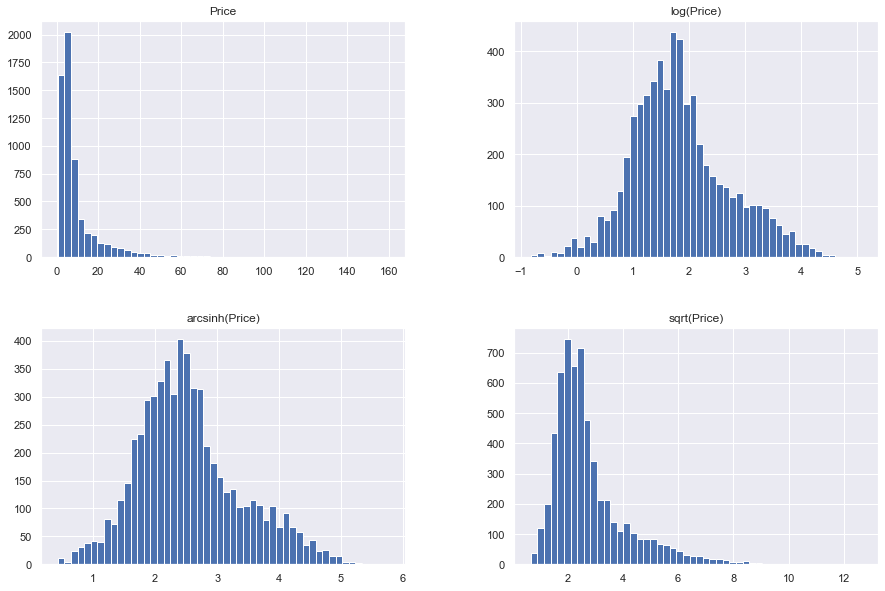

In [65]:
# testing various tranformations for 'Price'
data.hist(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data1['Price'], 50)
plt.title('Price')
plt.subplot(2,2,2)
plt.hist(np.log(data2['Price']), 50)
plt.title('log(Price)')
plt.subplot(2,2,3)
plt.hist(np.arcsinh(data2['Price']), 50)
plt.title('arcsinh(Price)')
plt.subplot(2,2,4)
plt.hist(np.sqrt(data2['Price']), 50)
plt.title('sqrt(Price)')

In [66]:
# Analysis showed log transofrmation be best applied to 'Kilometers_Driven',  'Power', 'New_Price' and Price' and Sqrt to 'Engine'
data2['Kilometers_Driven']=np.log(data2['Kilometers_Driven'])
data2['Engine']=np.sqrt(data2['Engine'])
data2['Power']=np.log(data2['Power'])
data2['New_Price']=np.log(data2['New_Price'])
data2['Price']=np.log(data2['Price'])

<font color = 'blue'>
    
### Outliers identification

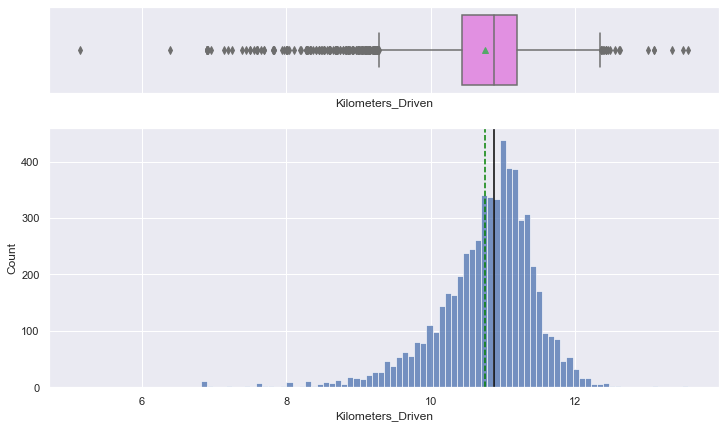

In [67]:
histogram_boxplot(data2, "Kilometers_Driven")

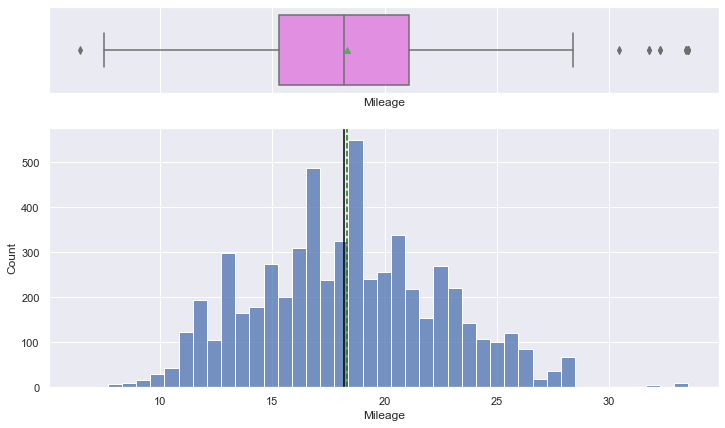

In [68]:
histogram_boxplot(data2, "Mileage")

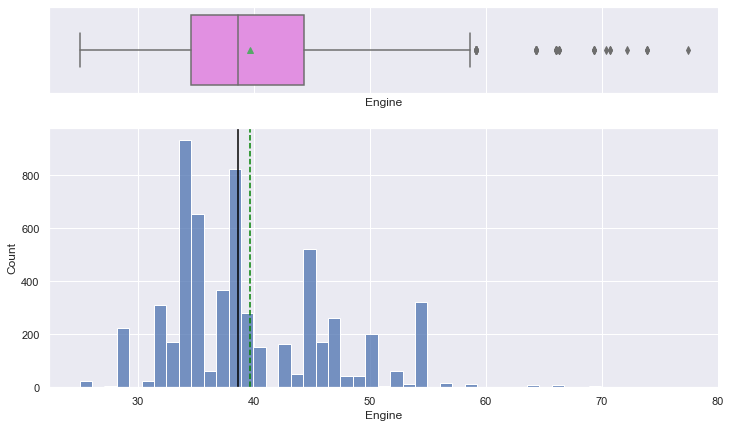

In [69]:
histogram_boxplot(data2, "Engine")

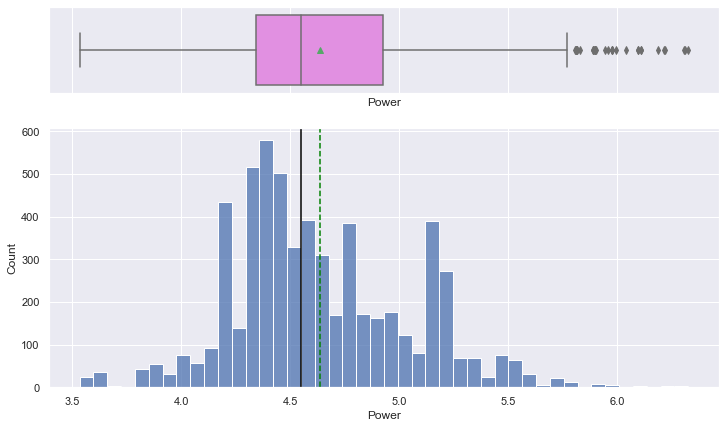

In [70]:
histogram_boxplot(data2, "Power")

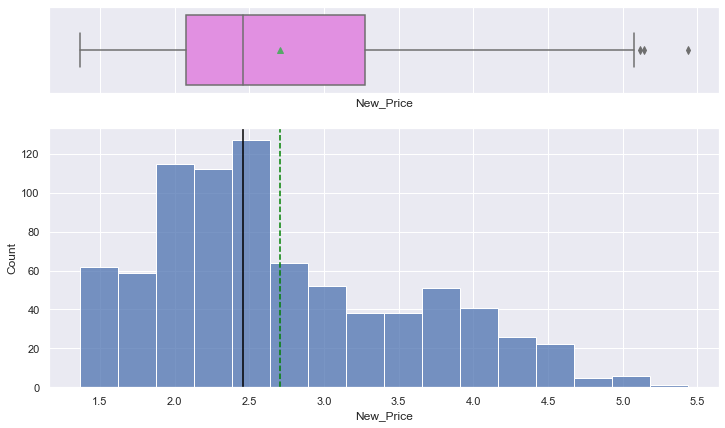

In [71]:
histogram_boxplot(data2, "New_Price")

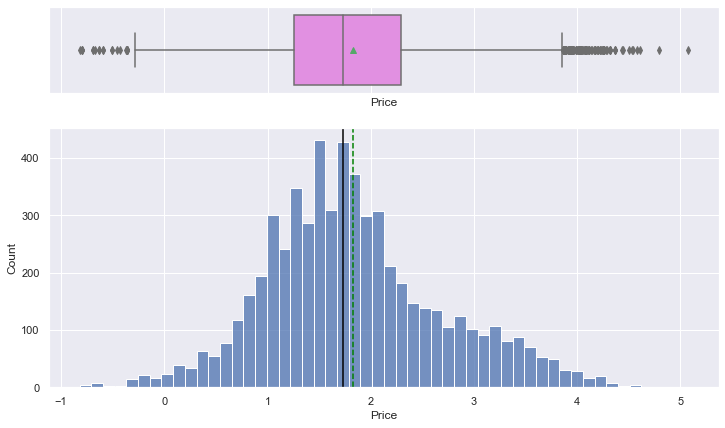

In [72]:
histogram_boxplot(data2, "Price")

<font color = 'darkblue'>
    
**Observation:**
After apllying data correction data seems consistent and no outliers that need correction have been detected

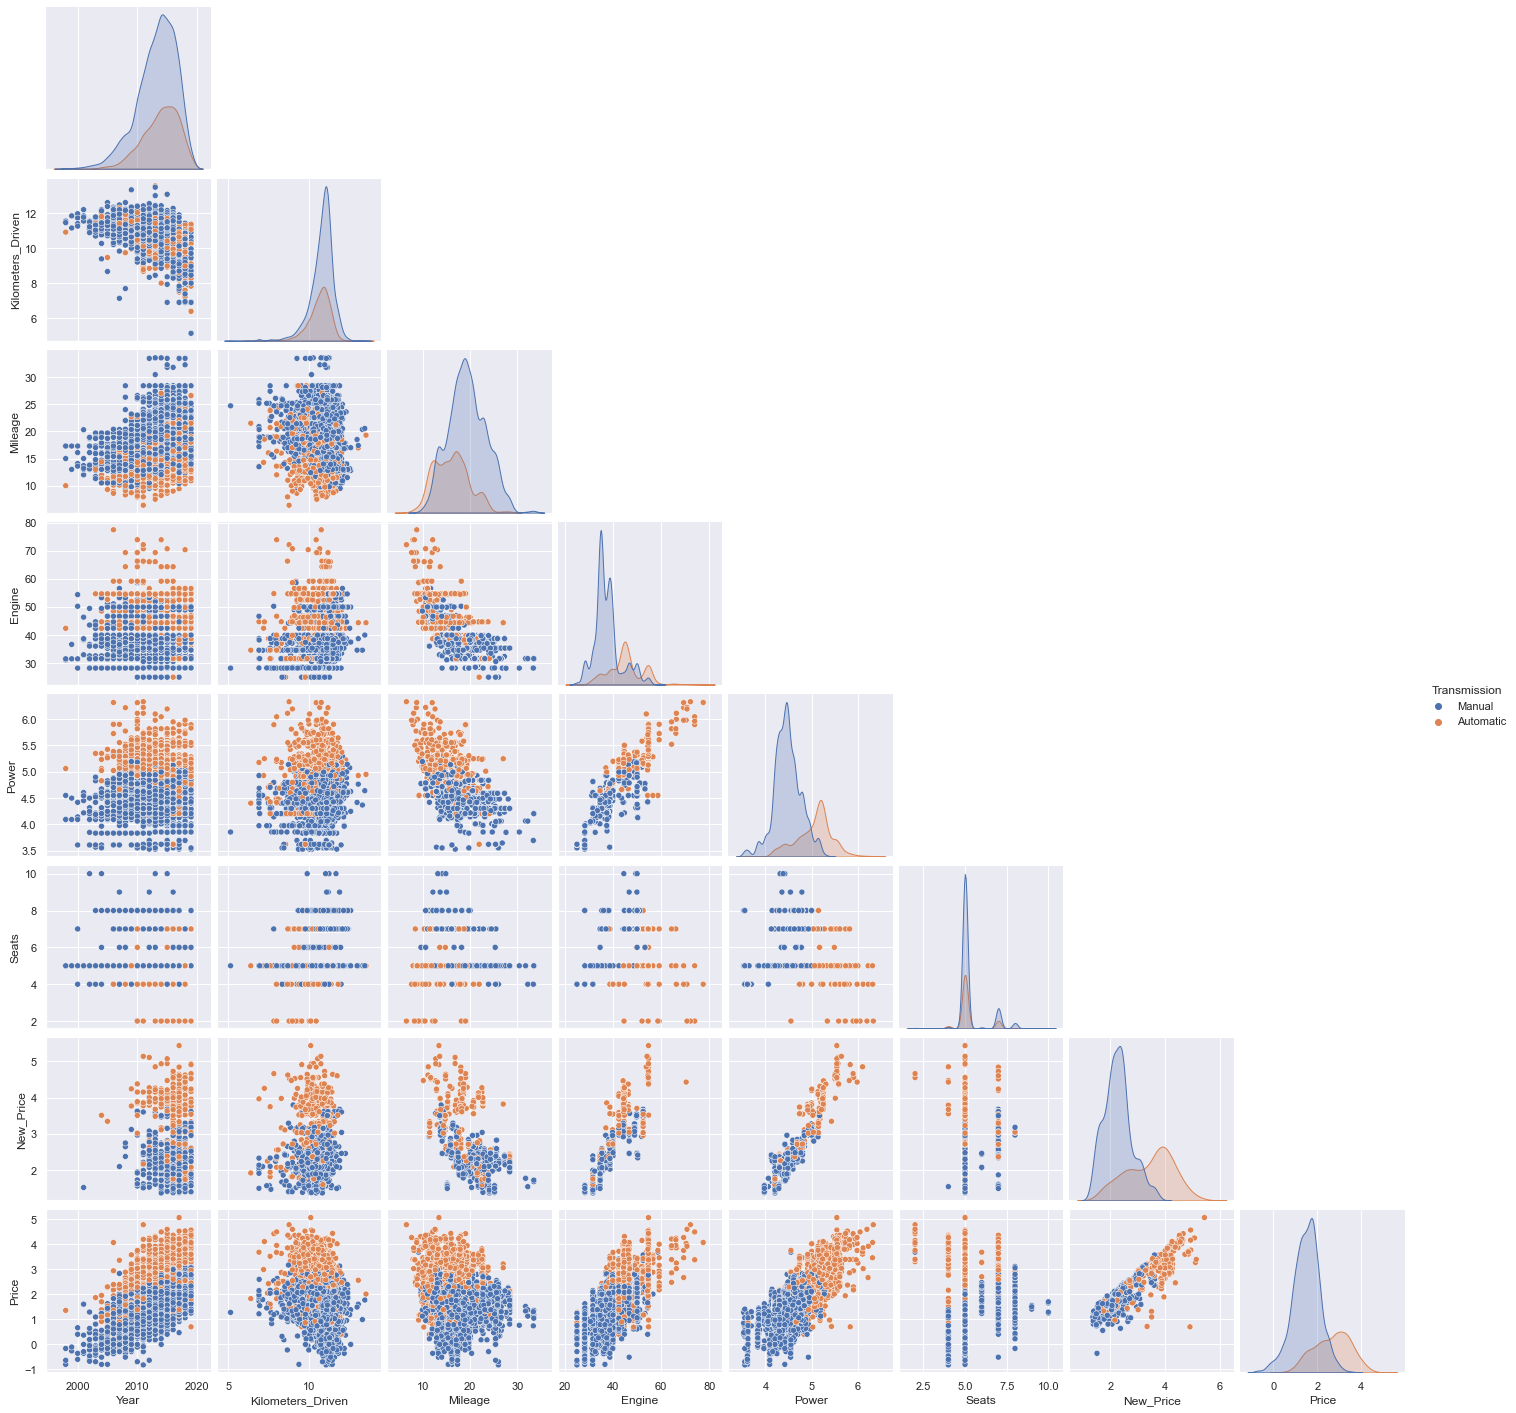

In [73]:
sns.pairplot(data=data2, hue="Transmission", diag_kind="kde", corner=True)
plt.show()

<font color = 'darkblue'>
    
**Observation:**
- Applied data processing significantly cleaned the dataset and improved correlations between target variable price and other variables which was not very good with the original data
- Now it is possible to make some insight on the data:
    - Price of the pre-owned cars is very much influenced by the car Engine, Power. It is also shaped by the car age and has some correlation with the kilometers driven, however not to the extent expected, which means that buyers are looking at other parameters other than age and mileage.
- Price of the old cars is very highly correlated with the price of the new cars, which further very much depends on the power and engine
- Number of seats seems to be more of a descriptive characteristic and apparently does not have a great influence on car price

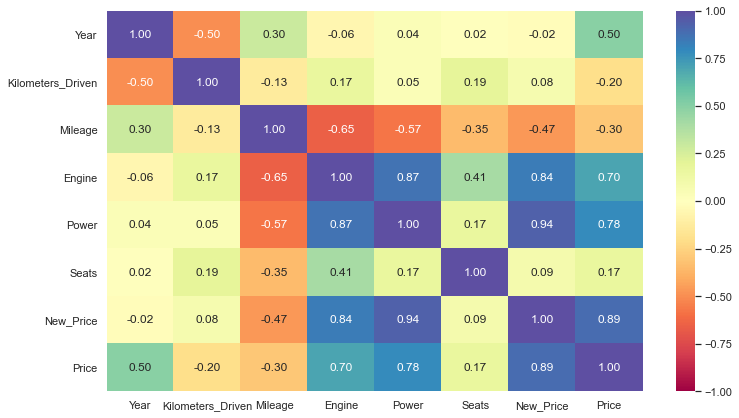

In [74]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<font color = 'darkblue'>
    
**Observation:**
Target variable price has good correlation (0.7) with Engine, and very good (>0.75) with Power and New_Price
There is decent correlation with Year as well

<font color = 'blue'>
    
### Encoding categorical variables

In [75]:
data3=data2.copy()

In [76]:
# Location and Make have too many unique values, we'll drop them
data3.drop(['Location'], axis=1, inplace=True)
data3.drop(['Make'], axis=1, inplace=True)

In [77]:
# Creating dummies
data3 = pd.get_dummies(
    data3,
    columns=data3.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

data3.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,11.184421,26.60,31.591138,4.063198,5.0,NaN,0.559616,0,0,0,1,0,0,0
1,2015,10.621327,19.67,39.774364,4.837868,5.0,NaN,2.525729,1,0,0,1,0,0,0
2,2011,10.736397,18.20,34.626579,4.485260,5.0,2.152924,1.504077,0,0,1,1,0,0,0
3,2012,11.373663,20.77,35.327043,4.485936,7.0,NaN,1.791759,1,0,0,1,0,0,0
4,2013,10.613246,15.20,44.362146,4.947340,5.0,NaN,2.875822,1,0,0,0,0,1,0
5,2012,11.225243,21.10,28.530685,4.010963,5.0,NaN,0.854415,0,1,0,1,0,0,0
6,2013,11.373652,23.08,38.223030,4.144721,5.0,NaN,1.252763,1,0,0,1,0,0,0
7,2016,10.491274,11.36,52.488094,5.144583,8.0,3.044522,2.862201,1,0,0,0,0,0,0
8,2013,11.073335,20.54,39.974992,4.640537,5.0,NaN,1.648659,1,0,0,1,0,0,0
9,2012,11.096379,22.30,35.327043,4.304065,5.0,NaN,0.667829,1,0,0,1,0,1,0


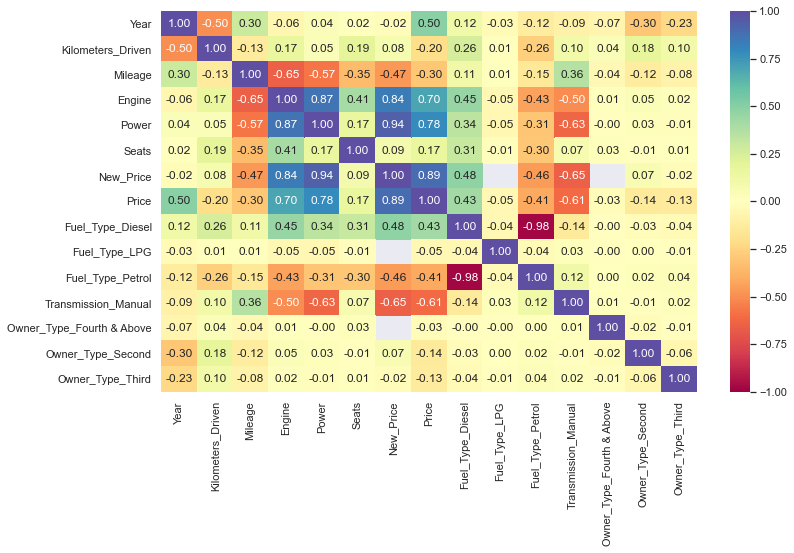

In [78]:
# Plot correlation diagram to see what variables have high correlations
plt.figure(figsize=(12, 7))
sns.heatmap(
    data3.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<font color = 'darkblue'>
    
**Observation:**
Some variables have very high correlation, such as New_Price and Power, Fuel_Type_Diesel and Fuel_Type_Petrol that can be dropped

In [79]:
data3.drop(['New_Price'], axis=1, inplace=True)
data3.drop(['Fuel_Type_Diesel'], axis=1, inplace=True)

## 6. Model building - Linear Regression

<font color = 'blue'>
    
### Split Data

In [80]:
# Splitting the data into dependent and independent sets
X = data3.drop(['Price'], axis=1)
# the dependent variable
y = data3[['Price']]

In [81]:
# Splitting the data itno testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [82]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4163
Number of rows in test data = 1785


<font color = 'blue'>
    
### Fit Linear Model

In [83]:
# We noticed very good linear relationships of dependent variable and independent, let's use linear regression for prediction
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Printing equation and parameters

In [84]:
coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.116735
Kilometers_Driven,-0.057844
Mileage,-0.009278
Engine,0.022351
Power,0.923392
Seats,-0.025860
Fuel_Type_LPG,0.050902
Fuel_Type_Petrol,-0.257044
Transmission_Manual,-0.327712
Owner_Type_Fourth & Above,-0.041322


<font color = 'darkblue'>
    
**Observation:**
* Coefficients of *Year*, *Engine*, *Power*, *Fuel_Type_LPG* columns are positive.
    - Increase in these will lead to an increase in Price.


* Coefficients of *Kilometers_Driven*, *Mileage*, *Seats*, *Fuel_Type_Petrol*, *Transmission_Manual*, *Owner_Type* columns are negative.
    - Increase in these will lead to a decrease in Price.

## 6. Model performance evaluation

In [85]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [86]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.305917,0.234332,0.874829,0.874467,5.464815e+12


In [87]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.307188,0.23434,0.875064,0.874218,3.598952e+12


<font color = 'darkblue'>
    
**Observation:**

- The train and test $R^2$ are extremely close, both being at 0.875.
    This indicates that model explains 87% of the variation, being pretty high number. The train and test values are very close, which tells that the model is relatively stable.

- RMSE values on the train and test sets are almost the same, an indication that the model is not overfitting.

- MAE indicates that our current model is able to predict price within a mean error of 0.23, which is relatively low

- Overall model performance is good

## 7. Actionable Insights & Recommendations

<font color = 'darkblue'>
    
**Observation:**
- The dataset provided was in relatively good shape and requied minimal cleaning for prediction model
- The created linear regression model showed very good statistics of training and testing, parameters showed that model is adequate, no overfitting or underfitting
- The most influence on the used car price has car power
- Automatic transmission and diesel fuel type also play a role
- In much lesser extent car price depends on car age and ownership
- Such parameters as kilometers driven, engine and alternative fuel types play very little role in the price
- However the greatest connection price of the pre-owned cars has wth the price of the analogous new cars should the company focus on the certain segments of the car value
    
**Recommendation**
- Based on the conducted EDA it is recommended to look either at the car power or the price of the analogous new car, whichever is available, to determine the pre-owned car price. Other parameters have much lesser impact on final price